In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
x0 = pd.read_csv('C:/Users/Mert/Downloads/world_internet_user.csv', encoding='latin-1')
x0.head(3)



,Country,Region,Population,Internet Users,% of Population
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28


In [7]:
x0.shape
x0.columns
x0['Country'].tolist()
owo = x0.duplicated().any() 

In [8]:
x0.isnull().values.any()

True

In [9]:
x0.isnull().sum()

Country            0
Region             1
Population         0
Internet Users     0
% of Population    0
dtype: int64

In [10]:
x0.fillna(0)

,Country,Region,Population,Internet Users,% of Population
0,_World,0,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28
...,...,...,...,...,...
238,Wallis & Futuna,Oceania,10932,6200,56.71
239,Western Sahara,Africa,611875,28000,4.58
240,Yemen,Middle East,30938435,8353377,27.00
241,Zambia,Africa,18920651,9870427,52.17


In [11]:
x0['Region'].value_counts()

Africa         58
America        55
Europe         53
Asia           35
Oceania        27
Middle East    14
Name: Region, dtype: int64

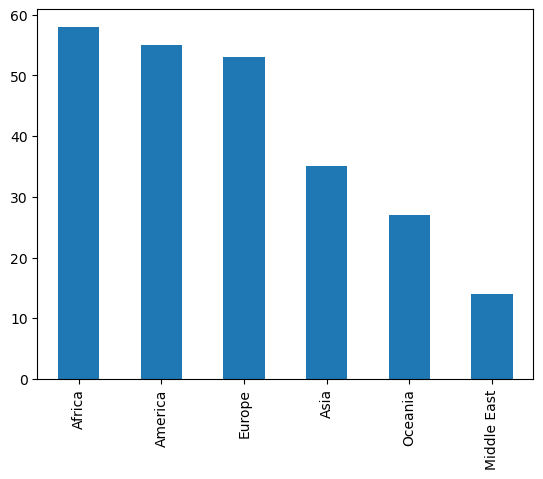

In [12]:
x0.Region.value_counts().plot(kind='bar')
plt.show()

In [14]:
regions = ('Africa','America','Europha', 'Asia','Oceania','Middle East')
counts = (58,55,53,35,27,14)

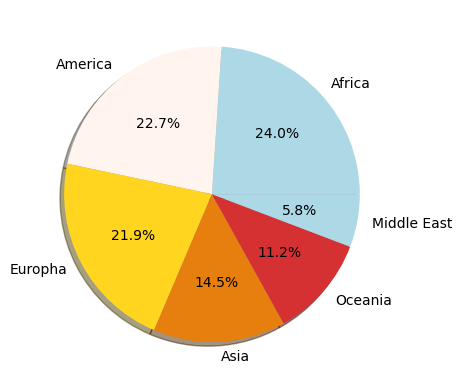

In [15]:
colors = ('#ADD8E6','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032')
plt.pie(
    counts,
    labels=regions,
    autopct='%1.1f%%',
    colors=colors,
    shadow=True
) 
plt.show()

In [16]:
x0 = x0.rename({'Internet Users': 'Internet_Users', '% of Population':'Population_Percentage'}, axis=1)

In [17]:
d = x0.drop(0) #Dropping unnecessary index and row


In [18]:
d.describe()


,Population,Internet_Users,Population_Percentage
count,2.420000e+02,2.420000e+02,242.000000
mean,3.272950e+07,2.241356e+07,69.927066
std,1.348221e+08,8.995328e+07,27.483660
min,5.960000e+02,4.140000e+02,0.080000
25%,3.257340e+05,1.930792e+05,52.180000
50%,5.279970e+06,2.846423e+06,77.970000
75%,1.958173e+07,9.840202e+06,91.020000
max,1.448314e+09,1.010740e+09,120.700000


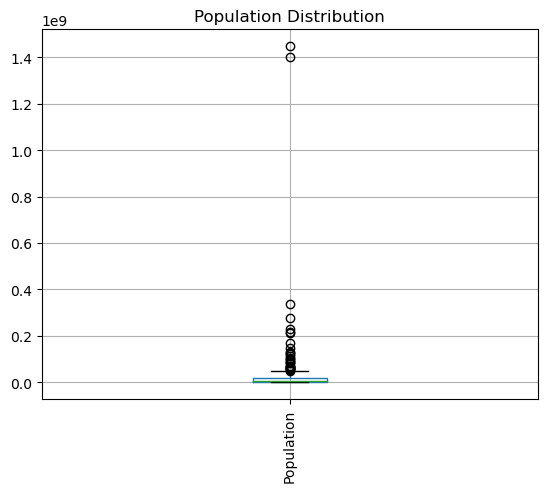

In [19]:
b1 = ['Population']

boxplot = d.boxplot(b1)  
plt.xticks(rotation=90)
plt.title("Population Distribution")
plt.show()

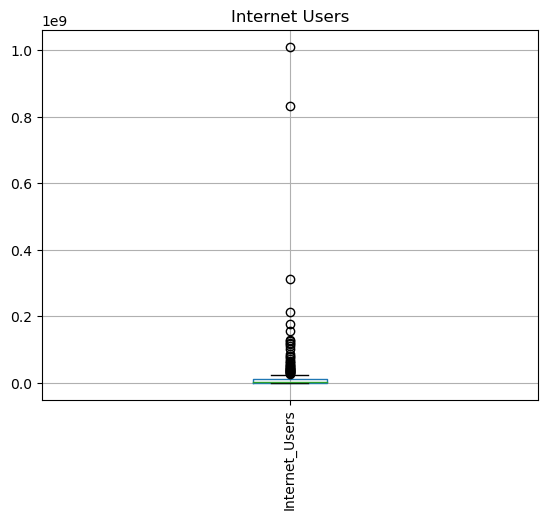

In [20]:
b2 = ['Internet_Users']

boxplot = d.boxplot(b2)  
plt.xticks(rotation=90)
plt.title("Internet Users")
plt.show()

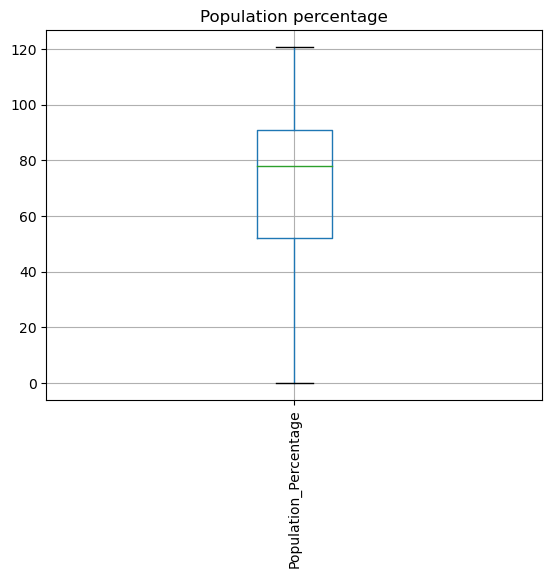

In [21]:
b3 = ['Population_Percentage']

boxplot = d.boxplot(b3)
plt.xticks(rotation=90)
plt.title("Population percentage")
plt.show()

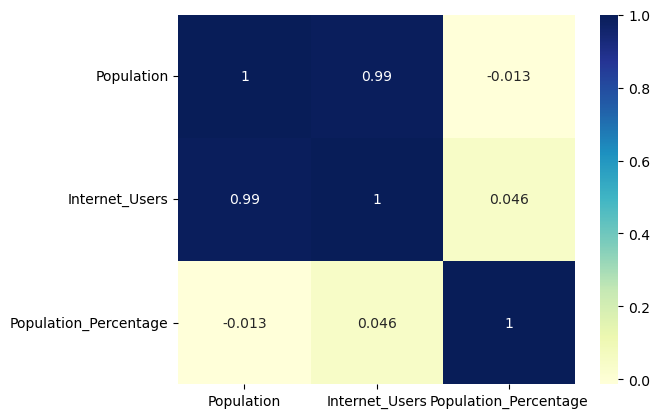

In [22]:
sns.heatmap(d.corr(), annot=True, cmap='YlGnBu'); # heatmaps shows correlation between numerical data

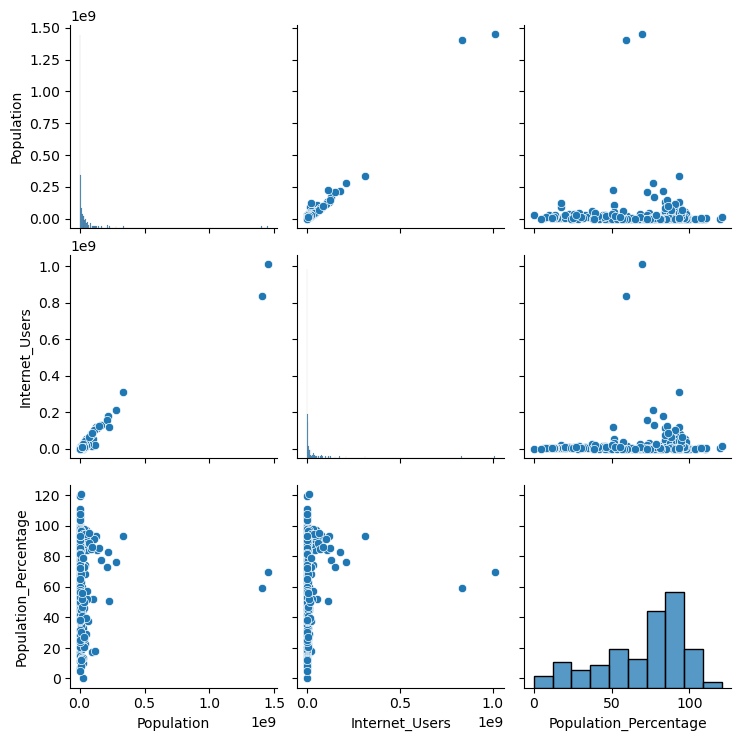

In [23]:
sns.pairplot(d, kind='scatter', hue=None); #pairplot for understanding distribution and correlation 


In [24]:
d[d['Internet_Users'] == d['Internet_Users'].max()] #Showing the max() result

,Country,Region,Population,Internet_Users,Population_Percentage
44,China,Asia,1448314408,1010740000,69.79


In [25]:
d[d['Internet_Users'] == d['Internet_Users'].min()] #Showing the min() result

,Country,Region,Population,Internet_Users,Population_Percentage
46,Cocos (Keeling) Is.,Oceania,596,414,69.46


In [30]:
riu = x0.groupby(['Region'])['Internet_Users'].agg(lambda x: x.unique().sum()/x.nunique())
riu

Region
Africa         1.036845e+07
America        1.623539e+07
Asia           8.382533e+07
Europe         1.416596e+07
Middle East    1.527783e+07
Oceania        1.199656e+06
Name: Internet_Users, dtype: float64

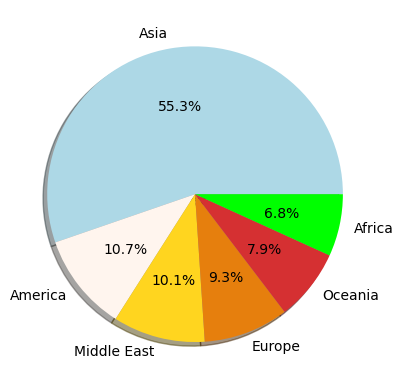

In [31]:
regions_iu = ('Asia', 'America', 'Middle East', 'Europe', 'Oceania', 'Africa')
counts_1 = (8.38, 1.62, 1.527, 1.41, 1.19, 1.03)

colors = ('#ADD8E6','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032', '#00FF00')
plt.pie(
    counts_1,
    labels=regions_iu,
    autopct='%1.1f%%',
    colors=colors,
    shadow=True
) 
plt.show()